In [28]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import plot_model 
from keras.utils.np_utils import to_categorical

import  numpy as np
import  matplotlib.pyplot as plt

import  sklearn
from    sklearn import linear_model
from sklearn.datasets import make_moons
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [46]:

X, Y = make_moons(noise=0.2, random_state=0, n_samples=1000)
X = scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5)


В данном случае классификация бинарная, поэтому во втором полносвязном слое используем функцию активации sigmoid(те работает лог регрессия) и в качестве функции потерь берем  binary_crossentropy.


In [47]:
model = Sequential()
model.add(Dense(32, input_dim=2,activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 

model.compile(optimizer='AdaDelta',  loss='binary_crossentropy',  metrics=['accuracy'])

In [48]:
model.fit(X_train, Y_train, batch_size=32, epochs=200,
          verbose=0, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10520229947566986
Test accuracy: 0.968


In [49]:
# строим сетку возможных координат в диапозоне -3, 3
grid = np.mgrid[-3:3:100j,-3:3:100j]
grid_2d = grid.reshape(2, -1).T
X, Y = grid
prediction_probs = model.predict_proba(grid_2d, batch_size=32, verbose=0)

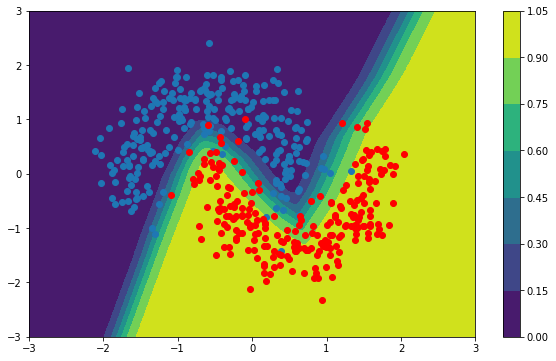

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))
contour = ax.contourf(X, Y, prediction_probs.reshape(100, 100))
ax.scatter(X_test[Y_test==0, 0], X_test[Y_test==0, 1])
ax.scatter(X_test[Y_test==1, 0], X_test[Y_test==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)

In [70]:
model = Sequential()
model.add(Dense(32, input_dim=2,activation='relu')) 
model.add(Dense(60, activation='relu'))
model.add(Dense(100, activation='relu'))

model.add(Dense(1, activation='sigmoid')) 

model.compile(optimizer='AdaDelta',  loss='binary_crossentropy',  metrics=['accuracy'])

In [71]:
model.fit(X_train, Y_train, batch_size=32, epochs=200,
          verbose=0, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12951863114163278
Test accuracy: 0.964


Добавление слоя  и изменения выбор другого оптимизатора не дают прироста accuracy. Пробовала adam, sgd

### 3 mnist


In [20]:

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

8


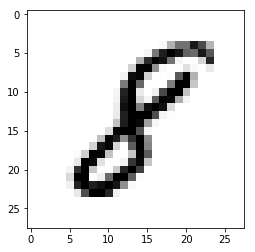

In [21]:
import matplotlib.pyplot as plt

image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [22]:
x_train.shape


(60000, 28, 28)

In [26]:
# Добавляем 4ое измерение, чтобы работать с Keras Api
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# нормализуем RGB код
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Количество элементов в  x_train', x_train.shape[0])
print('Количество элементов в x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Количество элементов в  x_train 60000
Количество элементов в x_test 10000


In [31]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Создаем модель,добавляем слои
model = Sequential()
#model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Преобразуем массив 2d  28*28 в 1d 28*28=784
model.add(Dense(128, activation=tf.nn.relu))
#model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [32]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.2545 - acc: 0.9269
Epoch 2/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.1104 - acc: 0.9672
Epoch 3/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0761 - acc: 0.9771
Epoch 4/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0580 - acc: 0.9824
Epoch 5/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0439 - acc: 0.9857
Epoch 6/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0343 - acc: 0.9895
Epoch 7/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0276 - acc: 0.9910
Epoch 8/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0224 - acc: 0.9932
Epoch 9/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0183 - acc: 0.9945
Epoch 10/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.0151 - acc: 0.9952

In [34]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 28us/step
Test accuracy: 0.9789


Добавим свертку и регулеризацию(Dropout)

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Создаем модель,добавляем слои
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Преобразуем массив 2d  28*28 в 1d 28*28=784
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax)) #10 - по количеству итоговых классов

In [36]:
# loss функцию и оптимизатор оставим те же
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 38s 638us/step - loss: 0.2045 - acc: 0.9391
Epoch 2/10
60000/60000 [==============================] - 39s 644us/step - loss: 0.0803 - acc: 0.9752
Epoch 3/10
60000/60000 [==============================] - 37s 620us/step - loss: 0.0562 - acc: 0.9824
Epoch 4/10
60000/60000 [==============================] - 37s 615us/step - loss: 0.0443 - acc: 0.9854
Epoch 5/10
60000/60000 [==============================] - 37s 609us/step - loss: 0.0345 - acc: 0.9887
Epoch 6/10
60000/60000 [==============================] - 37s 613us/step - loss: 0.0282 - acc: 0.9907
Epoch 7/10
60000/60000 [==============================] - 37s 619us/step - loss: 0.0250 - acc: 0.9912
Epoch 8/10
60000/60000 [==============================] - 37s 621us/step - loss: 0.0217 - acc: 0.99240s - loss: 0.0215 - 
Epoch 9/10
60000/60000 [==============================] - 38s 628us/step - loss: 0.0174 - acc: 0.9939
Epoch 10/10
60000/60000 [==============================] - 37s

In [37]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 2s 182us/step
Test accuracy: 0.9847


Точность повысилась 

Метка класса: 9


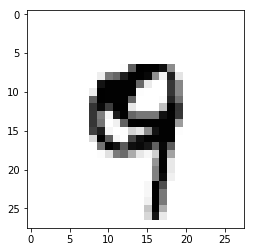

In [42]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print('Метка класса:', pred.argmax())

In [43]:
image_index = 4448
img = (np.expand_dims (x_test[image_index], 0))
pred = model.predict(img)

In [44]:
print(pred)

[[9.9999988e-01 1.5038365e-16 1.0109361e-09 3.0175761e-15 3.4190365e-22
  3.5010644e-11 7.7412637e-17 1.1119888e-10 2.1662351e-12 7.0248838e-08]]


Метка класса: 0


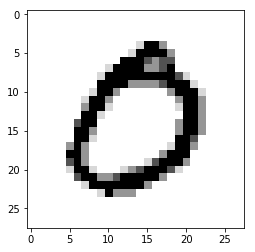

In [45]:
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
print('Метка класса:', pred.argmax())

In [ ]:
nn = Sequential()
nn.add(Flatten(20, input_shape=(28, 28)))
nn.add(Dense(20, input_dim=3, activation='relu'))
nn.add(Dense(20, activation='relu'))
nn.add(Dense(20, activation='relu'))
nn.add(Dense(1, activation='softmax'))
nn.compile(loss='sparse_categorical_crossentropy', optimizer=tf.train.AdamOptimizer(), metrics=['accuracy'])
nn.fit(X_train, y_train, batch_size=16, nb_epoch=100, verbose=1, validation_data=(X_test, y_test))
print(np.sum(np.round(nn.predict(X_test).flatten() ) == y_test) / y_test.shape[0])
plot_model_results(nn.predict, X, y)
